In [1]:
import sys
'geopandas' in sys.modules
!pip install geopandas


  Obtaining dependency information for fiona>=1.8 from https://files.pythonhosted.org/packages/a5/40/f25a33d54825d52f8b7f53adf8cb6d8f554179feb942bf2983c8b440decf/fiona-1.9.5-cp311-cp311-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 705.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 6.0 MB/s eta 0:00:0000:0100:01


In [2]:
import geopandas as gpd
import pandas as pd

In [4]:
italyMap = gpd.read_file('reg2011_g.shp')
regions = pd.read_csv('reg2011_g.csv')
covid = pd.read_csv('Covid.csv')

In [5]:
italyMap.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,PIEMONTE,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,VALLE D'AOSTA/VALLÉE D'AOSTE\r\nVALLE D'AOSTA/...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,LOMBARDIA,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,VENETO,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


In [7]:
italyMap['NOME_REG'] = regions['NOME_REG']

In [8]:
italyMap.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,Aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,Trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


<Axes: >

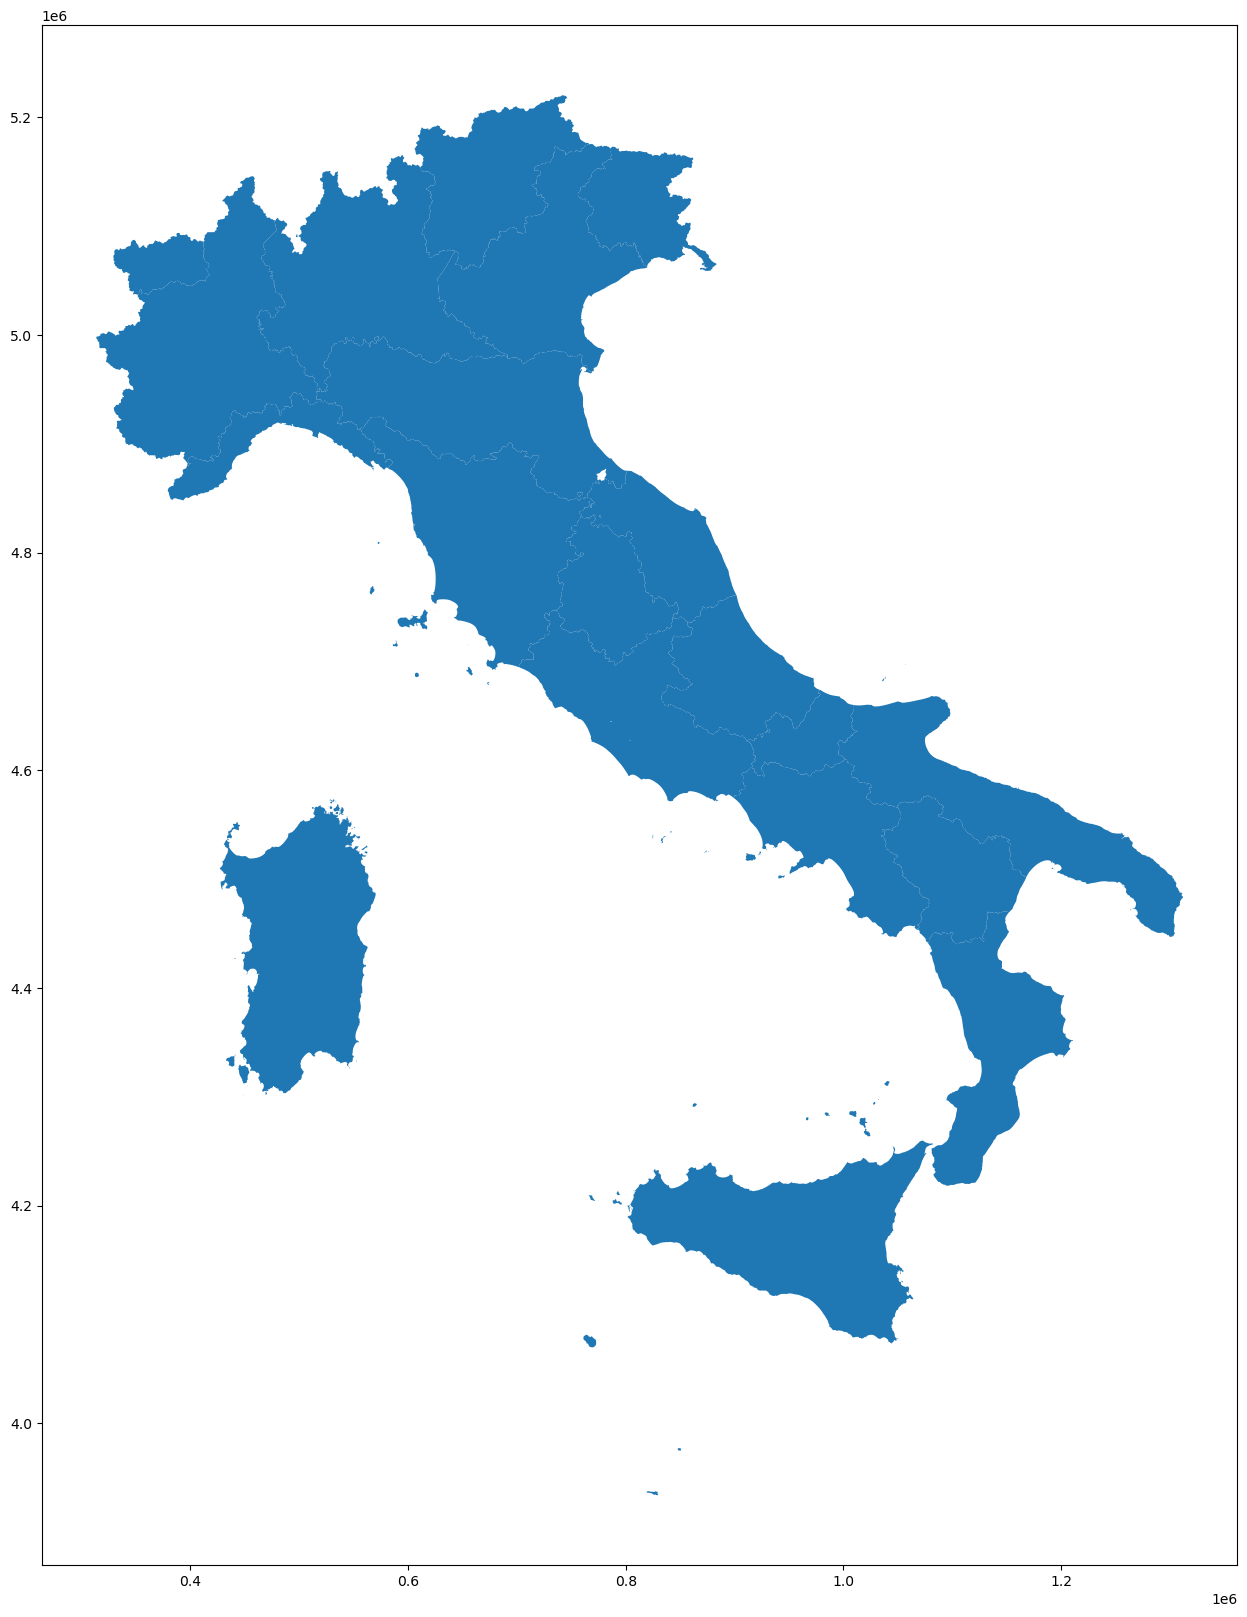

In [10]:
italyMap.plot(figsize=(20, 20))


In [11]:
covid.head()

,NOME_REG,Confirmed,Death
0,Piemonte,24832.0,2823.0
1,Aosta,1106.0,132.0
2,Lombardia,72889.0,13325.0
3,Trentino,6375.0,674.0
4,Veneto,17471.0,1315.0


In [12]:
df = italyMap.merge(covid, on='NOME_REG', how='right')
df.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Confirmed,Death
0,1.0,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",24832.0,2823.0
1,2.0,Aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5...",1106.0,132.0
2,3.0,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",72889.0,13325.0
3,4.0,Trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5...",6375.0,674.0
4,5.0,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",17471.0,1315.0


<Axes: title={'center': 'Confirmed'}>

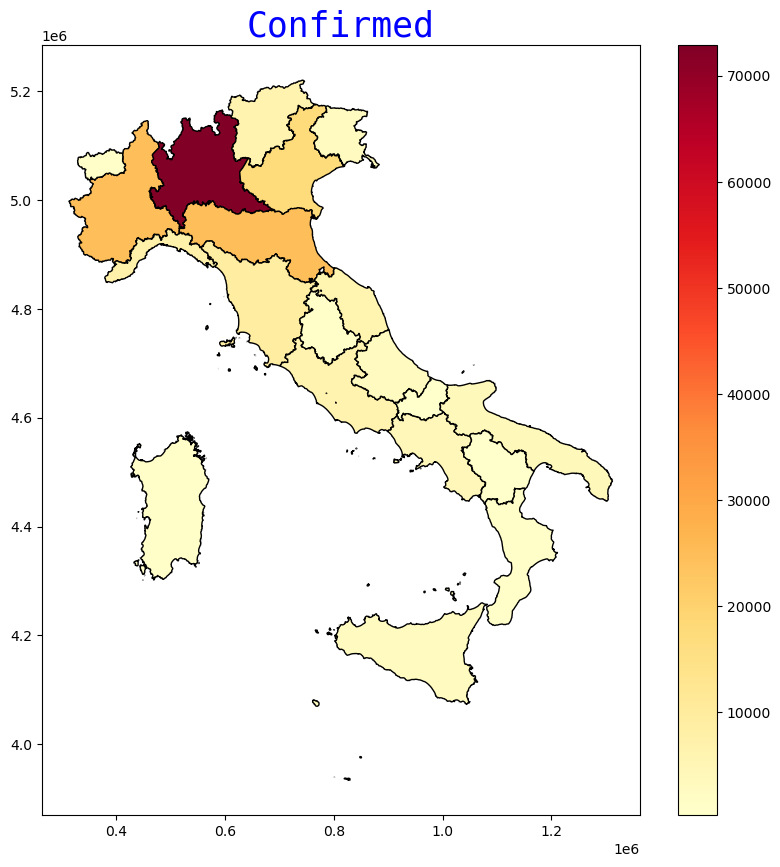

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 10))
column = 'Confirmed'
ax.set_title( column, fontdict={'fontsize':'25', 'fontweight':'3'},  color='Blue', fontfamily='monospace')

df.plot(
            ax=ax,
            column=column,
            cmap='YlOrRd',
            label='ciao',
            edgecolor= 'black',
            
            legend=True,
            categorical=False
)


<Axes: title={'center': 'Death'}>

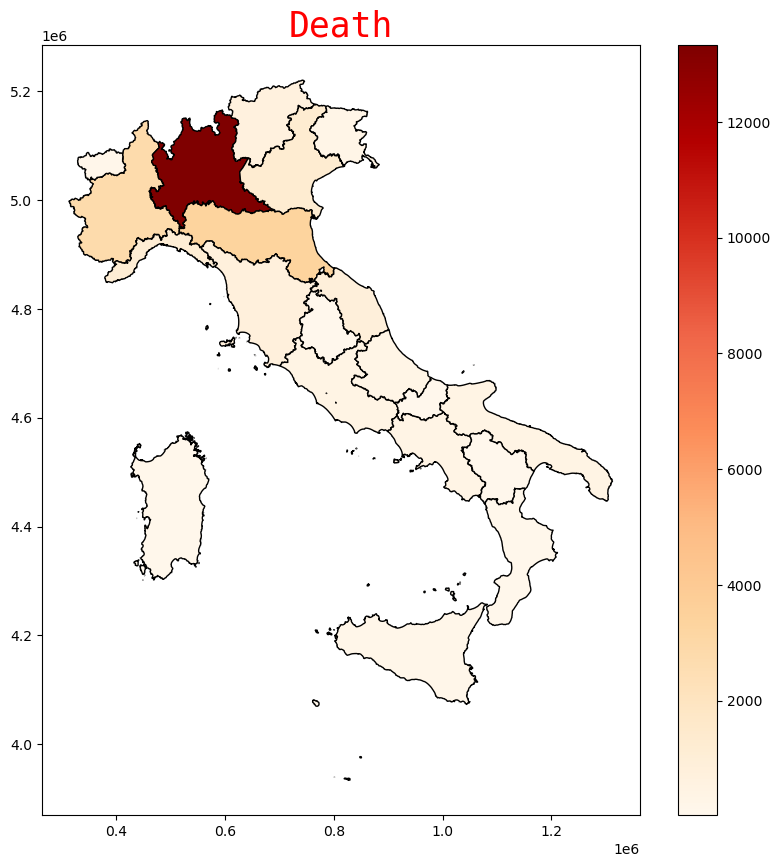

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 10))
column = 'Death'
ax.set_title( column, fontdict={'fontsize':'25', 'fontweight':'3'},  color='Red', fontfamily='monospace')

df.plot(
            ax=ax,
            column=column,
            cmap='OrRd',
            label='ciao',
            edgecolor= 'black',
            
            legend=True,
            categorical=False
)


<Axes: title={'center': 'Procent'}>

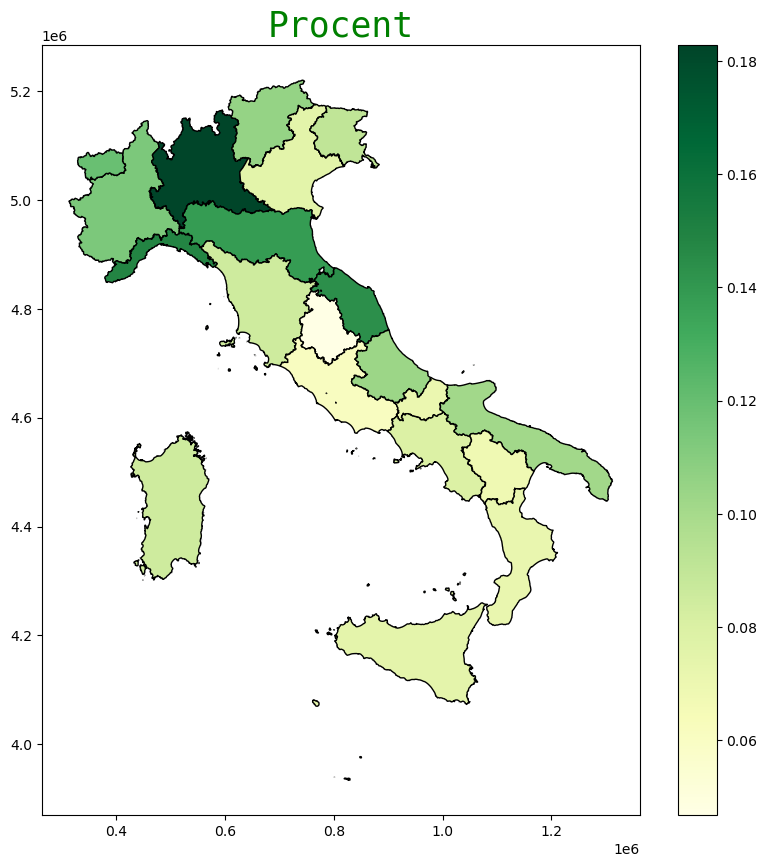

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 10))
df['Procent'] = df['Death'] / df['Confirmed']
df.head()
column = 'Procent'
ax.set_title( column, fontdict={'fontsize':'25', 'fontweight':'3'},  color='Green', fontfamily='monospace')

df.plot(
            ax=ax,
            column=column,
            cmap='YlGn',
            label='ciao',
            edgecolor= 'black',
            
            legend=True,
            categorical=False
)

